In [93]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.linear_model import LinearRegression
from scipy.stats import ttest_ind
import statsmodels.api as sm

In [95]:
call_data = pd.read_csv('./call_data_from_CAD.csv')
call_data.head()

,Unnamed: 0,IncidentNumber,Call_Created_Time,Call_First_Dispatched_Time,Call_First_On_Scene,Call_Cleared,Call_Zipcode,Beat,Call_Source,Call_Priority,InitialIncidentTypeDescription,IsPrimary,PrimaryUnitCallSign,RespondingUnitCallSign,Unit_Dispatched_Time,Unit_OnScene_Time,Unit_Cleared_Time,Disposition
0,1,OR-2016-01-01-16000001,1/1/16 0:00,1/1/16 0:04,1/1/16 0:09,1/1/16 0:54,97402.0,EP05,E911,3,ASSAULT,1,5E57,5E57,1/1/16 0:04,1/1/16 0:09,1/1/16 0:54,ADVISED
1,2,OR-2016-01-01-16000001,1/1/16 0:00,1/1/16 0:04,1/1/16 0:09,1/1/16 0:54,97402.0,EP05,E911,3,ASSAULT,0,5E57,4X40,1/1/16 0:09,1/1/16 0:09,1/1/16 0:46,ADVISED
2,3,OR-2016-01-01-16000001,1/1/16 0:00,1/1/16 0:04,1/1/16 0:09,1/1/16 0:54,97402.0,EP05,E911,3,ASSAULT,0,5E57,4E53,1/1/16 0:04,1/1/16 0:12,1/1/16 0:51,ADVISED
3,4,OR-2016-01-01-16000003,1/1/16 0:00,1/1/16 0:00,1/1/16 0:00,1/1/16 0:02,97401.0,EP02,SELF,6,TRAFFIC STOP,1,5T81,5T81,1/1/16 0:00,1/1/16 0:00,1/1/16 0:02,ADVISED
4,5,OR-2016-01-01-16000004,1/1/16 0:02,1/1/16 0:04,1/1/16 0:04,1/1/16 0:18,97401.0,EP02,E911,3,CHECK WELFARE,0,3X90,3F61,1/1/16 0:04,NaN,1/1/16 0:08,ASSISTED


In [96]:
# # Check raw unfiltered months
# pd.to_datetime(call_data['Call_First_Dispatched_Time'], errors='coerce').dt.month.value_counts().sort_index()

C:\Users\Norm\AppData\Local\Temp\ipykernel_16788\1261846952.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(call_data['Call_First_Dispatched_Time'], errors='coerce').dt.month.value_counts().sort_index()


Call_First_Dispatched_Time
1.0    111059
2.0    101720
3.0    110391
4.0    108151
5.0    112810
6.0    111536
7.0    116232
8.0     79941
Name: count, dtype: int64

In [97]:
call_data = call_data.drop('Unnamed: 0', axis=1)
call_data.head()

,IncidentNumber,Call_Created_Time,Call_First_Dispatched_Time,Call_First_On_Scene,Call_Cleared,Call_Zipcode,Beat,Call_Source,Call_Priority,InitialIncidentTypeDescription,IsPrimary,PrimaryUnitCallSign,RespondingUnitCallSign,Unit_Dispatched_Time,Unit_OnScene_Time,Unit_Cleared_Time,Disposition
0,OR-2016-01-01-16000001,1/1/16 0:00,1/1/16 0:04,1/1/16 0:09,1/1/16 0:54,97402.0,EP05,E911,3,ASSAULT,1,5E57,5E57,1/1/16 0:04,1/1/16 0:09,1/1/16 0:54,ADVISED
1,OR-2016-01-01-16000001,1/1/16 0:00,1/1/16 0:04,1/1/16 0:09,1/1/16 0:54,97402.0,EP05,E911,3,ASSAULT,0,5E57,4X40,1/1/16 0:09,1/1/16 0:09,1/1/16 0:46,ADVISED
2,OR-2016-01-01-16000001,1/1/16 0:00,1/1/16 0:04,1/1/16 0:09,1/1/16 0:54,97402.0,EP05,E911,3,ASSAULT,0,5E57,4E53,1/1/16 0:04,1/1/16 0:12,1/1/16 0:51,ADVISED
3,OR-2016-01-01-16000003,1/1/16 0:00,1/1/16 0:00,1/1/16 0:00,1/1/16 0:02,97401.0,EP02,SELF,6,TRAFFIC STOP,1,5T81,5T81,1/1/16 0:00,1/1/16 0:00,1/1/16 0:02,ADVISED
4,OR-2016-01-01-16000004,1/1/16 0:02,1/1/16 0:04,1/1/16 0:04,1/1/16 0:18,97401.0,EP02,E911,3,CHECK WELFARE,0,3X90,3F61,1/1/16 0:04,NaN,1/1/16 0:08,ASSISTED


In [98]:
call_data['Call_Created_Time'] = pd.to_datetime(
    call_data['Call_Created_Time'],
    format='%m/%d/%y %H:%M',
    errors='coerce'
)
call_data.head()

,IncidentNumber,Call_Created_Time,Call_First_Dispatched_Time,Call_First_On_Scene,Call_Cleared,Call_Zipcode,Beat,Call_Source,Call_Priority,InitialIncidentTypeDescription,IsPrimary,PrimaryUnitCallSign,RespondingUnitCallSign,Unit_Dispatched_Time,Unit_OnScene_Time,Unit_Cleared_Time,Disposition
0,OR-2016-01-01-16000001,2016-01-01 00:00:00,1/1/16 0:04,1/1/16 0:09,1/1/16 0:54,97402.0,EP05,E911,3,ASSAULT,1,5E57,5E57,1/1/16 0:04,1/1/16 0:09,1/1/16 0:54,ADVISED
1,OR-2016-01-01-16000001,2016-01-01 00:00:00,1/1/16 0:04,1/1/16 0:09,1/1/16 0:54,97402.0,EP05,E911,3,ASSAULT,0,5E57,4X40,1/1/16 0:09,1/1/16 0:09,1/1/16 0:46,ADVISED
2,OR-2016-01-01-16000001,2016-01-01 00:00:00,1/1/16 0:04,1/1/16 0:09,1/1/16 0:54,97402.0,EP05,E911,3,ASSAULT,0,5E57,4E53,1/1/16 0:04,1/1/16 0:12,1/1/16 0:51,ADVISED
3,OR-2016-01-01-16000003,2016-01-01 00:00:00,1/1/16 0:00,1/1/16 0:00,1/1/16 0:02,97401.0,EP02,SELF,6,TRAFFIC STOP,1,5T81,5T81,1/1/16 0:00,1/1/16 0:00,1/1/16 0:02,ADVISED
4,OR-2016-01-01-16000004,2016-01-01 00:02:00,1/1/16 0:04,1/1/16 0:04,1/1/16 0:18,97401.0,EP02,E911,3,CHECK WELFARE,0,3X90,3F61,1/1/16 0:04,NaN,1/1/16 0:08,ASSISTED


In [99]:
# Drop rows with invalid timestamps
call_data = call_data.dropna(subset=['Call_Created_Time'])

# Create 'date' and 'month' columns for later analysis
call_data['date'] = call_data['Call_Created_Time'].dt.date
call_data['month'] = call_data['Call_Created_Time'].dt.to_period('M').dt.to_timestamp()

# Subset to key columns and make a working copy
call_data_td = call_data[[
    'IncidentNumber', 
    'Call_Created_Time', 
    'PrimaryUnitCallSign', 
    'RespondingUnitCallSign', 
    'InitialIncidentTypeDescription',
    'date',
    'month'
]].copy()

# Clean and standardize string fields
call_data_td['PrimaryUnitCallSign'] = call_data_td['PrimaryUnitCallSign'].str.strip().str.upper()
call_data_td['RespondingUnitCallSign'] = call_data_td['RespondingUnitCallSign'].str.strip().str.upper()
call_data_td['InitialIncidentTypeDescription'] = call_data_td['InitialIncidentTypeDescription'].str.strip().str.upper()

# Drop any rows missing relevant identifiers or description
call_data_td = call_data_td.dropna(subset=[
    'PrimaryUnitCallSign',
    'RespondingUnitCallSign',
    'InitialIncidentTypeDescription'
])

call_data_td.head()

,IncidentNumber,Call_Created_Time,PrimaryUnitCallSign,RespondingUnitCallSign,InitialIncidentTypeDescription,date,month
0,OR-2016-01-01-16000001,2016-01-01 00:00:00,5E57,5E57,ASSAULT,2016-01-01,2016-01-01
1,OR-2016-01-01-16000001,2016-01-01 00:00:00,5E57,4X40,ASSAULT,2016-01-01,2016-01-01
2,OR-2016-01-01-16000001,2016-01-01 00:00:00,5E57,4E53,ASSAULT,2016-01-01,2016-01-01
3,OR-2016-01-01-16000003,2016-01-01 00:00:00,5T81,5T81,TRAFFIC STOP,2016-01-01,2016-01-01
4,OR-2016-01-01-16000004,2016-01-01 00:02:00,3X90,3F61,CHECK WELFARE,2016-01-01,2016-01-01


In [100]:
# Define exclusion lists
exclude_exact = {
    'TRANSPORT',
    'MENTAL TRANSPORT',
    'DISORDERLY MEDICAL TRANSPORT',
    'SHELTER TRANSPORT',
    'BASIC NEEDS'
}
exclude_keywords = ['TRANSPORT', 'PICKUP', 'BASIC NEEDS', 'SHELTER']
pattern = '|'.join(exclude_keywords)

# Identify incident types to exclude by keyword match or exact match
exc_partial = call_data_td[
    call_data_td['InitialIncidentTypeDescription'].str.contains(pattern, na=False)
]
exc_exact = call_data_td[
    call_data_td['InitialIncidentTypeDescription'].isin(exclude_exact)
]

# Combine and drop excluded rows
exc_comb = pd.concat([exc_partial, exc_exact]).drop_duplicates()
call_data_td = call_data_td.drop(exc_comb.index)

# Define regex pattern to match CAHOOTS unit call signs
call_signs = r"1J77\s*|3J79\s*|3J78\s*|3J77\s*|4J79\s*|3J81\s*|3J76\s*|2J28\s*|2J29\s*|CAHOOT\s*|CAHOT\s*|CAHO\s*"

# Create binary flags for CAHOOTS presence in primary and responding units
call_data_td['PrimaryIsCAH'] = call_data_td['PrimaryUnitCallSign'].str.contains(call_signs, regex=True, na=False)
call_data_td['RespondingIsCAH'] = call_data_td['RespondingUnitCallSign'].str.contains(call_signs, regex=True, na=False)

# Define "Is_Diverted" as calls where CAHOOTS responded but were not the primary unit
call_data_td['Is_Diverted'] = (~call_data_td['PrimaryIsCAH']) & (call_data_td['RespondingIsCAH'])
call_data_td.head()

,IncidentNumber,Call_Created_Time,PrimaryUnitCallSign,RespondingUnitCallSign,InitialIncidentTypeDescription,date,month,PrimaryIsCAH,RespondingIsCAH,Is_Diverted
0,OR-2016-01-01-16000001,2016-01-01 00:00:00,5E57,5E57,ASSAULT,2016-01-01,2016-01-01,False,False,False
1,OR-2016-01-01-16000001,2016-01-01 00:00:00,5E57,4X40,ASSAULT,2016-01-01,2016-01-01,False,False,False
2,OR-2016-01-01-16000001,2016-01-01 00:00:00,5E57,4E53,ASSAULT,2016-01-01,2016-01-01,False,False,False
3,OR-2016-01-01-16000003,2016-01-01 00:00:00,5T81,5T81,TRAFFIC STOP,2016-01-01,2016-01-01,False,False,False
4,OR-2016-01-01-16000004,2016-01-01 00:02:00,3X90,3F61,CHECK WELFARE,2016-01-01,2016-01-01,False,False,False


In [101]:
print(f"Excluded (partial): {len(exc_partial)}")
print(f"Excluded (exact): {len(exc_exact)}")
print(f"Total excluded: {len(exc_comb)}")
call_data_td['Is_Diverted'].value_counts()

Excluded (partial): 14078
Excluded (exact): 14078
Total excluded: 13960


Is_Diverted
False    823446
True       8602
Name: count, dtype: int64

In [102]:
call_data_td = call_data_td[
    call_data_td['Call_Created_Time'] < '2022-05-01'
]
call_data_td.head()

,IncidentNumber,Call_Created_Time,PrimaryUnitCallSign,RespondingUnitCallSign,InitialIncidentTypeDescription,date,month,PrimaryIsCAH,RespondingIsCAH,Is_Diverted
0,OR-2016-01-01-16000001,2016-01-01 00:00:00,5E57,5E57,ASSAULT,2016-01-01,2016-01-01,False,False,False
1,OR-2016-01-01-16000001,2016-01-01 00:00:00,5E57,4X40,ASSAULT,2016-01-01,2016-01-01,False,False,False
2,OR-2016-01-01-16000001,2016-01-01 00:00:00,5E57,4E53,ASSAULT,2016-01-01,2016-01-01,False,False,False
3,OR-2016-01-01-16000003,2016-01-01 00:00:00,5T81,5T81,TRAFFIC STOP,2016-01-01,2016-01-01,False,False,False
4,OR-2016-01-01-16000004,2016-01-01 00:02:00,3X90,3F61,CHECK WELFARE,2016-01-01,2016-01-01,False,False,False


In [103]:
call_data_td['Call_Created_Time'].min(), call_data_td['Call_Created_Time'].max()

(Timestamp('2016-01-01 00:00:00'), Timestamp('2022-04-30 23:58:00'))

In [104]:
overall_diverted_proportion = call_data_td['Is_Diverted'].mean()
print(f"Overall Diversion Rate: {overall_diverted_proportion:.2%}")

Overall Diversion Rate: 1.23%


In [105]:
monthly = (
    call_data_td.groupby('month')['Is_Diverted']
    .agg(['sum', 'count'])
    .rename(columns={'sum': 'Diverted', 'count': 'Total'})
)

monthly['Proportion_Diverted'] = monthly['Diverted'] / monthly['Total']
monthly.reset_index(inplace=True)
monthly.head()

,month,Diverted,Total,Proportion_Diverted
0,2016-01-01,142,13242,0.010723
1,2016-02-01,137,13415,0.010212
2,2016-03-01,155,12999,0.011924
3,2016-04-01,169,12981,0.013019
4,2016-05-01,210,13219,0.015886


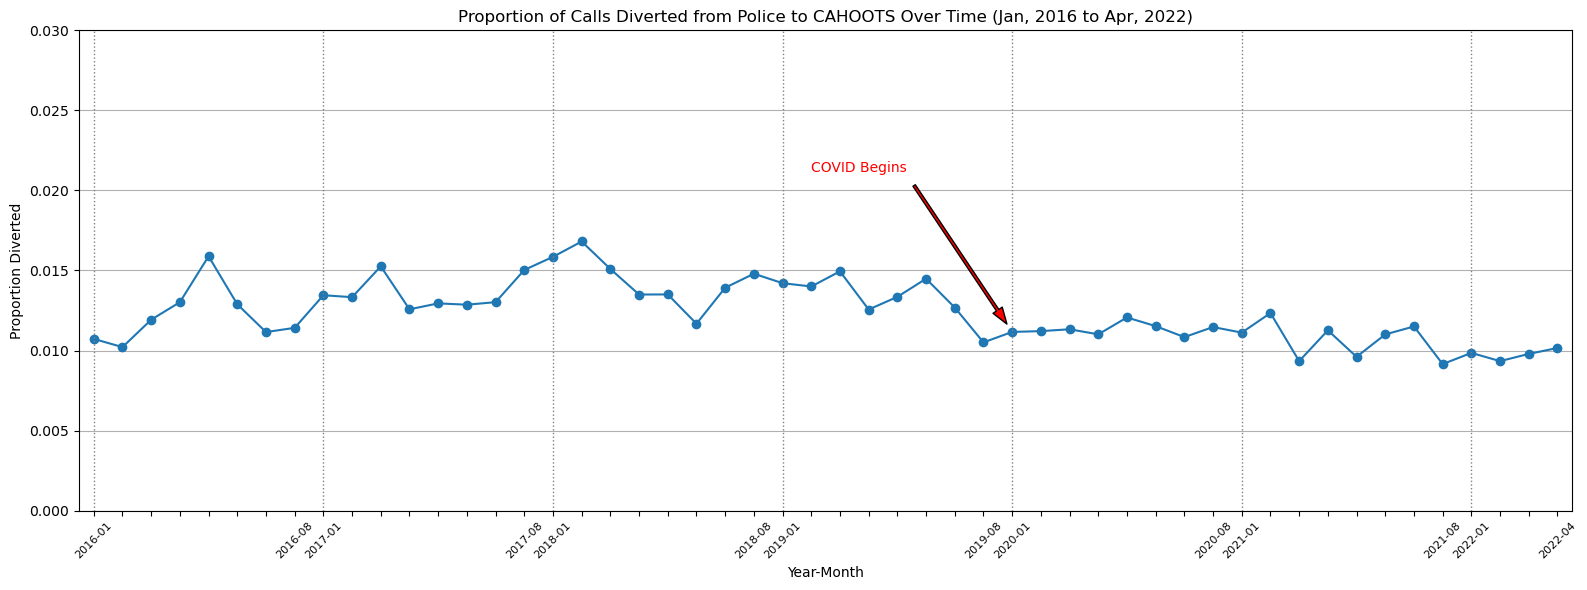

True
32 0.011159981618853804


In [106]:
plt.figure(figsize=(16, 6))
plt.plot(monthly['month'].astype(str), monthly['Proportion_Diverted'], marker='o')


# Find all January months and add April 2022 manually
jan_labels = monthly[monthly['month'].dt.month == 1]['month'].astype(str).tolist()
if '2022-04' in monthly['month'].astype(str).values:
    jan_labels.append('2022-04')

# Set xticks to every month, but only label Jan + final April
monthly['month_str'] = monthly['month'].dt.to_period('M').astype(str)
all_months = monthly['month_str'].tolist()
tick_labels = [
    label if label.endswith('-01') or label.endswith('-08') or label == '2022-04' else ''
    for label in all_months
]
tick_locs = list(range(len(all_months)))


covid_month = '2020-01'
if covid_month in all_months:
    covid_index = all_months.index(covid_month)
    covid_value = monthly.loc[monthly['month_str'] == covid_month, 'Proportion_Diverted'].values[0]

    
    plt.annotate(
        'COVID Begins',
        xy=(covid_index, covid_value),
        xytext=(covid_index - 7, covid_value + 0.01),
        arrowprops=dict(facecolor='red', shrink=0.05, width=2, headwidth=8),
        fontsize=10,
        color='red'
    )
# covid_index = monthly['month'].astype(str).tolist().index('2020-01')
# plt.axvline(x=covid_index, color='gray', linestyle='dotted', linewidth=1)
jan_indexes = [i for i, m in enumerate(all_months) if m.endswith('-01')]
for idx in jan_indexes:
    plt.axvline(x=idx, color='gray', linestyle='dotted', linewidth=1)

plt.xticks(tick_locs, tick_labels, rotation=45, fontsize=8)
plt.margins(x=0.01)
plt.title("Proportion of Calls Diverted from Police to CAHOOTS Over Time (Jan, 2016 to Apr, 2022)")
plt.xlabel("Year-Month")
plt.ylabel("Proportion Diverted")
plt.ylim(0, 0.03)
plt.grid(axis="y")
plt.tight_layout()
plt.show()
# jan 1 2017 - new shift 
# oct 10 2018 - new van
print('2020-01' in all_months)  # Should be True
print(covid_index, covid_value)

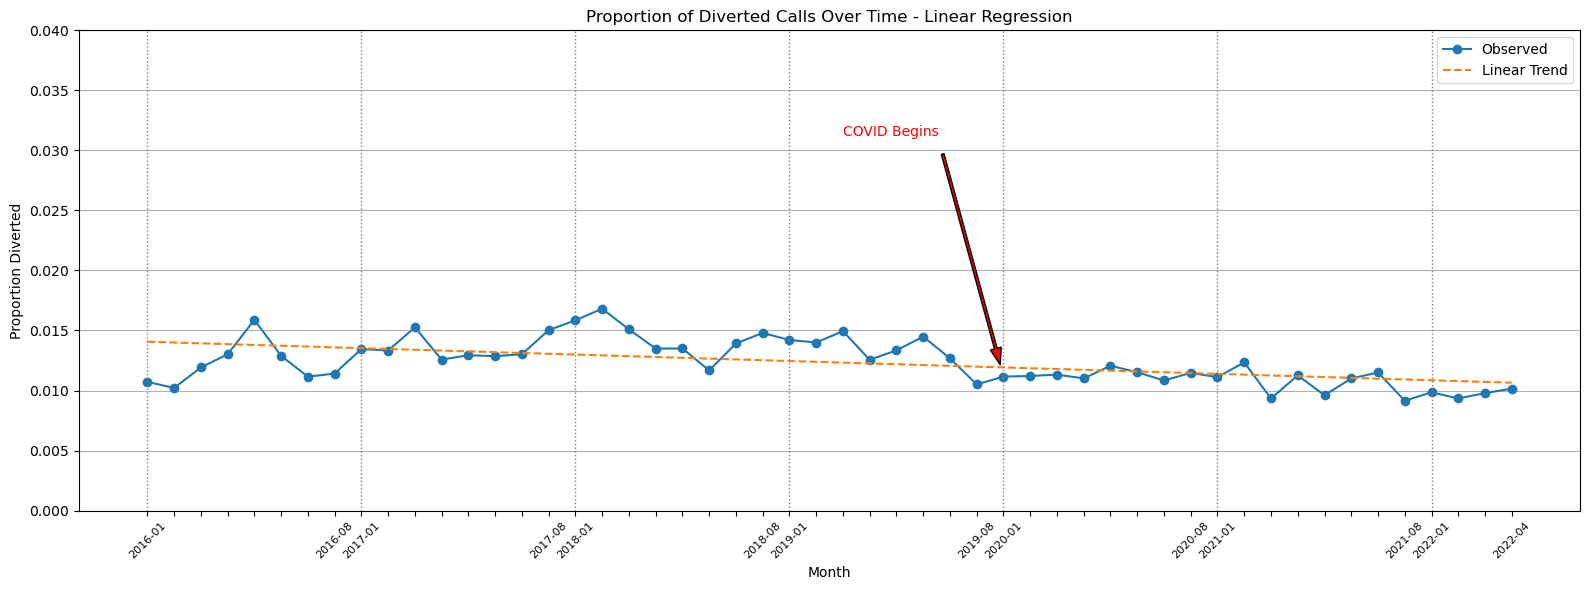

In [107]:
# # Convert month to numeric (e.g., 0, 1, 2, ...)
monthly = monthly.copy()
monthly['month_num'] = np.arange(len(monthly))

# # Fit model
X = monthly[['month_num']]
y = monthly['Proportion_Diverted']
model = LinearRegression().fit(X, y)

# # Add predicted trendline to plot
# monthly['trend'] = model.predict(X)
# plt.figure(figsize=(16, 6))
# plt.plot(monthly['month'].astype(str), monthly['Proportion_Diverted'], label='Observed', marker='o')
# plt.plot(monthly['month'].astype(str), monthly['trend'], label='Linear Trend', linestyle='--')
# plt.xticks(tick_locs, tick_labels, rotation=45, fontsize=8)
# plt.title("Proportion of Diverted Calls Over Time - Linear Regression")
# plt.xlabel("Month")
# plt.ylabel("Proportion Diverted")
# plt.ylim(0, 0.04)
# plt.grid(axis='y')
# plt.legend()
# plt.tight_layout()
# plt.show()
# Add predicted trendline to plot
monthly['trend'] = model.predict(X)
plt.figure(figsize=(16, 6))
plt.plot(monthly['month_num'], monthly['Proportion_Diverted'], label='Observed', marker='o')
plt.plot(monthly['month_num'], monthly['trend'], label='Linear Trend', linestyle='--')

# # Adjust xticks: match month_num to your custom labels
# plt.xticks(ticks=tick_locs, labels=tick_labels, rotation=45, fontsize=8)

# # Annotation for COVID
# if '2020-01' in all_months:
#     covid_index = all_months.index('2020-01')
#     covid_value = monthly.loc[monthly['month_str'] == '2020-01', 'Proportion_Diverted'].values[0]

#     plt.annotate(
#         'COVID Begins',
#         xy=(covid_index, covid_value),
#         xytext=(covid_index - 7, covid_value + 0.01),
#         arrowprops=dict(facecolor='red', shrink=0.05, width=2, headwidth=8),
#         fontsize=10,
#         color='red'
#     )

# plt.title("Proportion of Diverted Calls Over Time - Linear Regression")
# plt.xlabel("Month")
# plt.ylabel("Proportion Diverted")
# plt.ylim(0, 0.04)
# plt.grid(axis='y')
# plt.legend()
# plt.tight_layout()
# plt.show()

# plt.figure(figsize=(16, 6))
# plt.plot(monthly['month'].astype(str), monthly['Proportion_Diverted'], label='Observed', marker='o')
# plt.plot(monthly['month'].astype(str), monthly['trend'], label='Linear Trend', linestyle='--')

# # Add annotation for COVID start
covid_month = '2020-01'
if covid_month in all_months:
    covid_index = all_months.index(covid_month)
    covid_value = monthly.loc[monthly['month_str'] == covid_month, 'Proportion_Diverted'].values[0]
    
    plt.annotate(
        'COVID Begins',
        xy=(covid_index, covid_value),
        xytext=(covid_index - 6, covid_value + 0.02),
        arrowprops=dict(facecolor='red', shrink=0.05, width=2, headwidth=8),
        fontsize=10,
        color='red'
    )

# Vertical lines for each January (optional)
jan_indexes = [i for i, m in enumerate(all_months) if m.endswith('-01')]
for idx in jan_indexes:
    plt.axvline(x=idx, color='gray', linestyle='dotted', linewidth=1)

# Tick settings
plt.xticks(tick_locs, tick_labels, rotation=45, fontsize=8)
plt.title("Proportion of Diverted Calls Over Time - Linear Regression")
plt.xlabel("Month")
plt.ylabel("Proportion Diverted")
plt.ylim(0, 0.04)
plt.grid(axis='y')
plt.legend()
plt.tight_layout()
plt.show()



In [108]:
cahoots_units = {"1J77", "3J79", "3J78", "4J79", "3J81", "3J76", "2J28", "2J29", "CAHOOT", "CAHOT", "CAHO"}

# Identify CAHOOTS units
call_data_td['PrimaryIsCAH'] = call_data_td['PrimaryUnitCallSign'].isin(cahoots_units)
call_data_td['RespondingIsCAH'] = call_data_td['RespondingUnitCallSign'].isin(cahoots_units)

# Flag for direct CAHOOTS dispatch
call_data_td['Is_CAHOOTS_Direct'] = (call_data_td['RespondingIsCAH'] &
    (call_data_td['PrimaryIsCAH'] | call_data_td['PrimaryUnitCallSign'].isna())
)
call_data_td['Is_CAHOOTS_Direct'].value_counts()

Is_CAHOOTS_Direct
False    645369
True      52660
Name: count, dtype: int64

In [109]:
monthly_summary = call_data_td.groupby('month').agg({
    'Is_Diverted': 'sum',
    'Is_CAHOOTS_Direct': 'sum',
    'IncidentNumber': 'count'
}).rename(columns={
    'Is_Diverted': 'Diverted',
    'Is_CAHOOTS_Direct': 'Direct_CAHOOTS',
    'IncidentNumber': 'Total_Calls'
})

monthly_summary['Other_Calls'] = (monthly_summary['Total_Calls'] - 
    monthly_summary['Diverted'] - monthly_summary['Direct_CAHOOTS']
)

monthly_summary['Proportion_CAHOOTS_All'] = (monthly_summary['Diverted'] + monthly_summary['Direct_CAHOOTS']) / monthly_summary['Total_Calls']

monthly_summary.reset_index(inplace=True)
monthly_summary.head()

,month,Diverted,Direct_CAHOOTS,Total_Calls,Other_Calls,Proportion_CAHOOTS_All
0,2016-01-01,142,581,13242,12519,0.054599
1,2016-02-01,137,581,13415,12697,0.053522
2,2016-03-01,155,641,12999,12203,0.061235
3,2016-04-01,169,693,12981,12119,0.066405
4,2016-05-01,210,772,13219,12237,0.074287


In [110]:
monthly = pd.merge(monthly, monthly_summary[['month', 'Proportion_CAHOOTS_All']], on='month')
monthly['month_str'] = monthly['month'].astype(str)

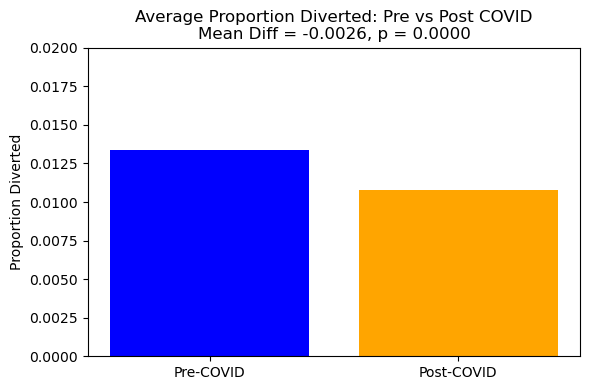

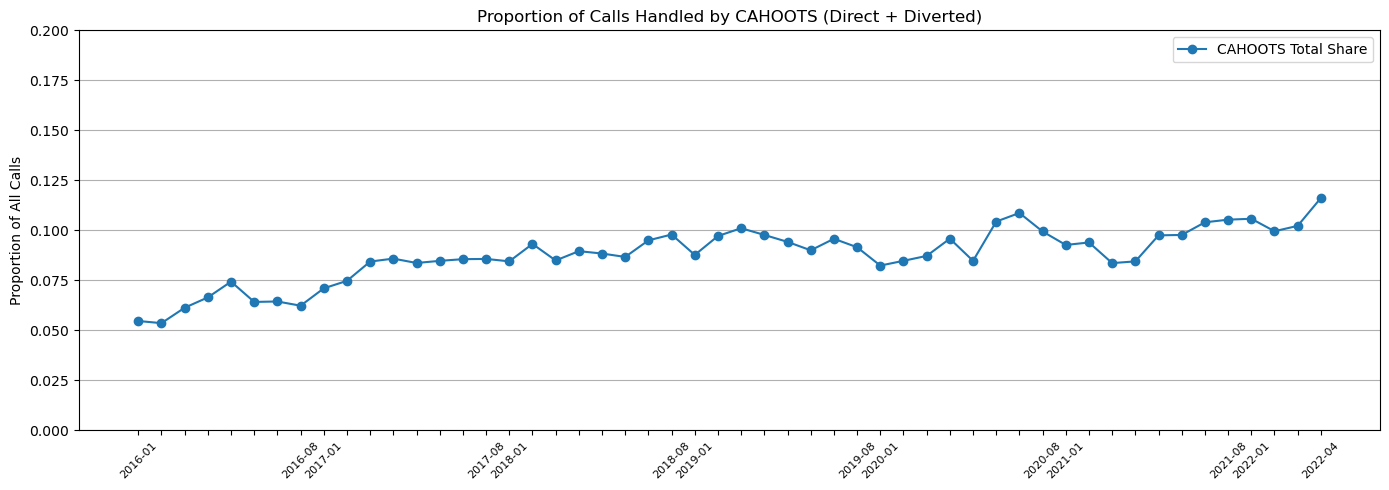

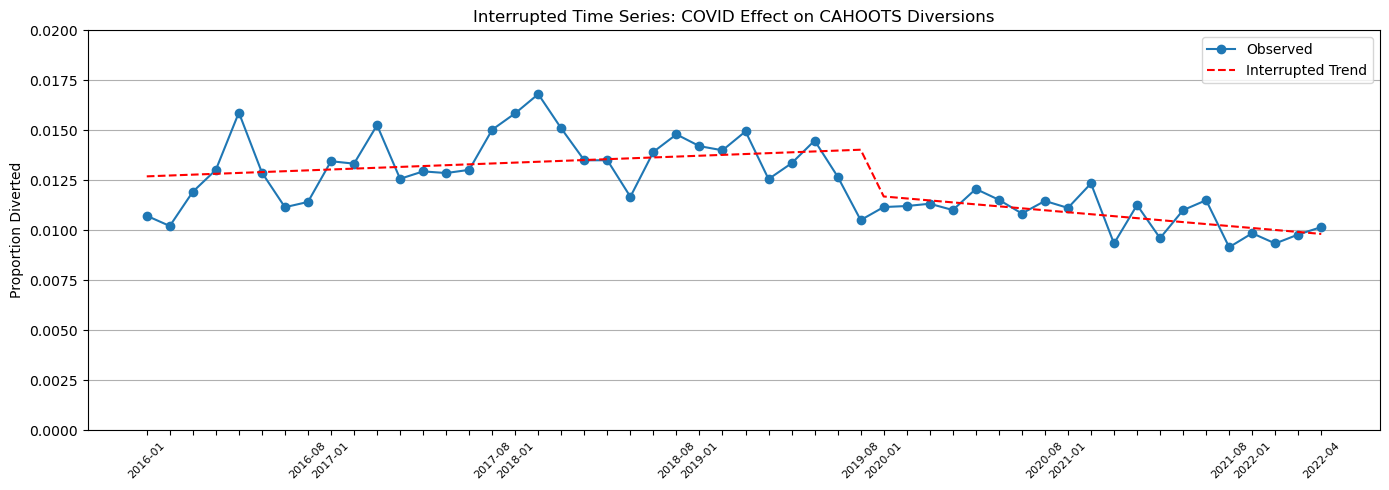

4.737463785459991e-09


In [129]:
# Prepare date boundaries
pre_covid = monthly[monthly['month'] < '2020-01']
post_covid = monthly[(monthly['month'] >= '2020-01') & (monthly['month'] < '2022-04')]

# -- 1. Pre/Post COVID Comparison (t-test and means) --
pre_mean = pre_covid['Proportion_Diverted'].mean()
post_mean = post_covid['Proportion_Diverted'].mean()
mean_diff = post_mean - pre_mean

t_stat, p_val = ttest_ind(pre_covid['Proportion_Diverted'], post_covid['Proportion_Diverted'], equal_var=False)


# -- 3. Interrupted Time Series Setup --
# Ensure month is datetime for comparison
#monthly['month'] = pd.to_datetime(monthly['month'].astype(str))

# Add numeric time and COVID indicators
monthly['month_num'] = np.arange(len(monthly))
monthly['post_covid'] = (monthly['month'] >= '2020-01').astype(int)
monthly['month_post_covid'] = monthly['month_num'] * monthly['post_covid']


# Fit interrupted regression manually


X = sm.add_constant(monthly[['month_num', 'post_covid', 'month_post_covid']])
y = monthly['Proportion_Diverted']
model = sm.OLS(y, X).fit()
monthly['interrupted_trend'] = model.predict(X)


plt.figure(figsize=(6, 4))
x_labels = ['Pre-COVID', 'Post-COVID']
x_pos = [0, 1]
y_vals = [pre_mean, post_mean]

plt.bar(x_pos, y_vals, color=['blue', 'orange'])
plt.xticks(x_pos, x_labels)
plt.ylabel("Proportion Diverted")
plt.ylim(0, 0.02)
plt.title(f'Average Proportion Diverted: Pre vs Post COVID\nMean Diff = {mean_diff:.4f}, p = {p_val:.4f}')
plt.tight_layout()
plt.show()

monthly['month_str'] = monthly['month'].dt.to_period('M').astype(str)
all_months = monthly['month_str'].tolist()
tick_labels = [
    label if label.endswith('-01') or label.endswith('-08') or label == '2022-04' else ''
    for label in all_months
]
tick_locs = list(range(len(all_months)))

plt.figure(figsize=(14, 5))
plt.plot(monthly['month_str'], monthly['Proportion_CAHOOTS_All'], label='CAHOOTS Total Share', marker='o')
plt.xticks(ticks=tick_locs, labels=tick_labels, rotation=45, fontsize=8)
plt.ylabel("Proportion of All Calls")
plt.ylim(0, 0.2)
plt.title("Proportion of Calls Handled by CAHOOTS (Direct + Diverted)")
plt.grid(axis='y')
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 5))
plt.plot(monthly['month_str'], monthly['Proportion_Diverted'], label='Observed', marker='o')
plt.plot(monthly['month_str'], monthly['interrupted_trend'], label='Interrupted Trend', linestyle='--', color='red')
plt.xticks(ticks=tick_locs, labels=tick_labels, rotation=45, fontsize=8)
plt.ylabel("Proportion Diverted")
plt.ylim(0, 0.02)
plt.title("Interrupted Time Series: COVID Effect on CAHOOTS Diversions")
plt.grid(axis='y')
plt.legend()
plt.tight_layout()
plt.show()
"""
# Prepare visual outputs
fig, axs = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Pre/Post Comparison Bar Chart
x_labels = ['Pre-COVID', 'Post-COVID']
x_pos = [0, 1]
y_vals = [pre_mean, post_mean]

axs[0].bar(x_pos, [pre_mean, post_mean], color=['blue', 'orange'])
axs[0].set_xticks(x_pos)
axs[0].set_xticklabels(x_labels)
axs[0].set_title(f'Average Proportion Diverted: Pre vs Post COVID\nDiff = {mean_diff:.4f}, p = {p_val:.4f}')
axs[0].set_ylabel("Proportion Diverted")

# CAHOOTS Total Proportion Line
axs[1].plot(monthly['month_str'], monthly['Proportion_CAHOOTS_All'], label='CAHOOTS Total Share', marker='o')
axs[1].set_title("Proportion of Calls Handled by CAHOOTS (Direct + Diverted)")
axs[1].set_ylabel("Proportion of All Calls")
axs[1].tick_params(axis='x', rotation=45)
axs[1].grid(axis='y')
axs[1].legend()

plt.tight_layout()
plt.show()

# Show interrupted time series plot separately
plt.figure(figsize=(14, 5))
plt.plot(monthly['month_str'], monthly['Proportion_Diverted'], label='Observed', marker='o')
plt.plot(monthly['month_str'], monthly['interrupted_trend'], label='Interrupted Trend', linestyle='--', color='red')
plt.title("Interrupted Time Series: COVID Effect on CAHOOTS Diversions")
plt.xlabel("Month")
plt.ylabel("Proportion Diverted")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend()
plt.tight_layout()
plt.show()
"""
print(p_val)

In [74]:
# Show the number of records per month
print(call_data_td['month'].value_counts().sort_index())


month
2016-01-01    13242
2016-02-01    13415
2016-03-01    12999
2016-04-01    12981
2016-05-01    13219
2016-06-01    13580
2016-07-01    14885
2016-08-01    10249
2017-01-01    12786
2017-02-01    12077
2017-03-01    13174
2017-04-01    12726
2017-05-01    13597
2017-06-01    14229
2017-07-01    14592
2017-08-01    10379
2018-01-01    13501
2018-02-01    11541
2018-03-01    13385
2018-04-01    12966
2018-05-01    13923
2018-06-01    14819
2018-07-01    14367
2018-08-01     9800
2019-01-01    13726
2019-02-01    11501
2019-03-01    12781
2019-04-01    13057
2019-05-01    13857
2019-06-01    13739
2019-07-01    14823
2019-08-01    10088
2020-01-01    15233
2020-02-01    14450
2020-03-01    15098
2020-04-01    14804
2020-05-01    16578
2020-06-01    14318
2020-07-01    15041
2020-08-01    10204
2021-01-01    14033
2021-02-01    12803
2021-03-01    14780
2021-04-01    14475
2021-05-01    15096
2021-06-01    14993
2021-07-01    15562
2021-08-01    10381
2022-01-01    14213
2022-02-01    

In [76]:
print(sorted(call_data_td['month'].unique()))


[Timestamp('2016-01-01 00:00:00'), Timestamp('2016-02-01 00:00:00'), Timestamp('2016-03-01 00:00:00'), Timestamp('2016-04-01 00:00:00'), Timestamp('2016-05-01 00:00:00'), Timestamp('2016-06-01 00:00:00'), Timestamp('2016-07-01 00:00:00'), Timestamp('2016-08-01 00:00:00'), Timestamp('2017-01-01 00:00:00'), Timestamp('2017-02-01 00:00:00'), Timestamp('2017-03-01 00:00:00'), Timestamp('2017-04-01 00:00:00'), Timestamp('2017-05-01 00:00:00'), Timestamp('2017-06-01 00:00:00'), Timestamp('2017-07-01 00:00:00'), Timestamp('2017-08-01 00:00:00'), Timestamp('2018-01-01 00:00:00'), Timestamp('2018-02-01 00:00:00'), Timestamp('2018-03-01 00:00:00'), Timestamp('2018-04-01 00:00:00'), Timestamp('2018-05-01 00:00:00'), Timestamp('2018-06-01 00:00:00'), Timestamp('2018-07-01 00:00:00'), Timestamp('2018-08-01 00:00:00'), Timestamp('2019-01-01 00:00:00'), Timestamp('2019-02-01 00:00:00'), Timestamp('2019-03-01 00:00:00'), Timestamp('2019-04-01 00:00:00'), Timestamp('2019-05-01 00:00:00'), Timestamp('20